# XGBoost 모델 테스트
---

In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import matplotlib.pyplot as plt

## [1] 데이터 로딩
---

In [29]:
target = pd.read_csv("./target.csv")

data = pd.read_csv("./data_final.csv", index_col=0)

In [30]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    300 non-null    object
 1   IND     300 non-null    int64 
 2   CIVIL   300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              300 non-null    object 
 1   AT                300 non-null    float64
 2   LT                300 non-null    float64
 3   HT                300 non-null    float64
 4   CAP_TEMP_EF       300 non-null    float64
 5   DONGNAM_TEMP_EF   300 non-null    float64
 6   DAEGYUNG_TEMP_EF  300 non-null    float64
 7   CHOONG_TEMP_EF    300 non-null    float64
 8   HONAM_TEMP_EF     300 non-null    float64
 9   MEAN_TEMP_EF      300 non-null    float64
 10  POWER_WATER       300 non-null    int64  
 11  POWER_FIRE        300 non-null    int64  
 12  POWER_NUCLEAR     300 non-null    int64  
 13  POWER_NAEYEON     300 non-null    int64  
 14  POWER_GROUP       300 non-null    int64  
 15  POWER_TRANS       300 non-null    int64  
 16  POWER_GAS         300 non-null    int64  
 1

## [2] 데이터 전처리
---

In [20]:
# 타겟 나누기
target_civil = target["CIVIL"]
target_ind = target["IND"]

In [32]:
# YEAR 날리기
data_drop = data.drop(columns=["YEAR"])

In [66]:
# train test 분할
X_train = data_drop.iloc[:264,:]
X_test = data_drop.iloc[264:,:]

y_train_civil = target_civil[:264]
y_test_civil = target_civil[264:]

y_train_ind = target_ind[:264]
y_test_ind = target_ind[264:]

In [67]:
print(X_train.shape, y_train_civil.shape)

(264, 29) (264,)


In [68]:
# 정규화 시키기
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

## [3] 모델
---

In [69]:
model_civil = xgb.XGBRegressor(max_depth=5)
model_ind = xgb.XGBRegressor(max_depth=5)

model_civil.fit(X_train_scaled, y_train_civil)
model_ind.fit(X_train_scaled, y_train_ind)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [70]:
pred_civil = model_civil.predict(X_test_scaled)
pred_ind = model_ind.predict(X_test_scaled)

civil = list(y_test_civil)
ind = list(y_test_ind)

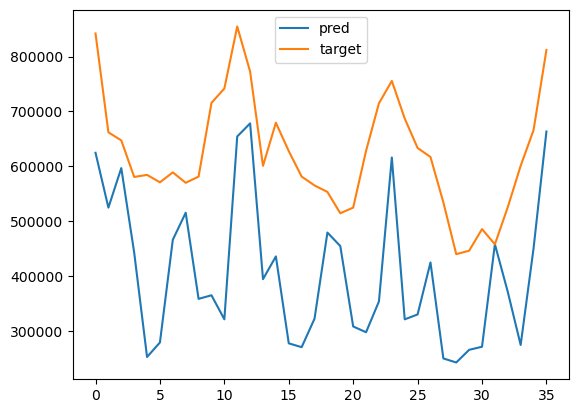

In [75]:
plt.plot(pred_civil, label="pred")
plt.plot(civil, label="target")
plt.legend()
plt.show()

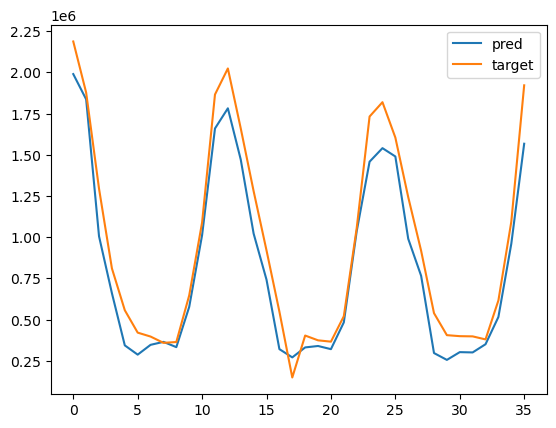

In [77]:
plt.plot(pred_ind, label="pred")
plt.plot(ind, label="target")
plt.legend()
plt.show()